In [1]:
import os 
import pandas as pd
os.chdir(r"C:\Users\arunk\Finance_project")
os.getcwd()


'C:\\Users\\arunk\\Finance_project'

In [2]:
redeem_data = pd.read_csv("data/MF_Model_base.csv",
                 parse_dates= {"date" : ["Year","Month"]})
redeem_data.info()

c:\Users\arunk\Finance_project\Finance_project\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946207 entries, 0 to 946206
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             946207 non-null  datetime64[ns]
 1   Customer ID      946207 non-null  int64         
 2   FA ID            946207 non-null  int64         
 3   Scheme Code      946207 non-null  int64         
 4   Txn. No          946207 non-null  object        
 5   Txn. Type        946207 non-null  object        
 6   Txn. Sub Type    946207 non-null  object        
 7   Units            946207 non-null  float64       
 8   Purchase Amount  946207 non-null  float64       
 9   City             943217 non-null  object        
 10  Pin Code         945645 non-null  object        
 11  Date of Birth    937774 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 86.6+ MB


In [3]:
min_date = redeem_data["date"].min()
max_date = redeem_data["date"].max()
print(min_date,max_date)
from datetime import date, datetime

2013-12-01 00:00:00 2022-12-01 00:00:00


In [180]:
index_data = pd.read_csv(r"data\NIFTY FINANCIAL SERVICES_Data.csv")
index_data.head()

,Date,Open,High,Low,Close
0,30 Dec 2022,19161.95,19166.70,18922.30,18981.20
1,29 Dec 2022,18903.15,19179.15,18796.95,19090.60
2,28 Dec 2022,18956.30,19042.60,18940.55,18982.85
3,27 Dec 2022,19002.05,19036.85,18838.30,19011.20
4,26 Dec 2022,18610.70,19010.65,18559.20,18928.65


In [181]:
cust_data = pd.read_excel(r"data\MF Customer Details.xlsx")
cust_data.head()

,Customer ID,Occupation,Risk Appetite
0,131015,Salaried,High
1,131006,Salaried,High
2,131005,Salaried,Low
3,130988,Salaried,Medium
4,130986,Salaried,Low


In [182]:
# print(cust_data.columns)
# print(index_data.columns)
# print(redeem_data.columns)
print(redeem_data.dtypes)
# print(index_data.dtypes)
# print(cust_data.dtypes)
redeem_data.head(2)

date           datetime64[ns]
Customer ID             int64
Txn. Type              object
dtype: object


,date,Customer ID,Txn. Type
0,2022-11-01,131015,P
1,2022-11-01,131006,P


In [183]:
index_data["Date"] = pd.to_datetime(index_data["Date"])
redeem_data["Date"] = pd.to_datetime(redeem_data["date"])

In [184]:
redeem_data = redeem_data[['date',"Customer ID",'Txn. Type',]]
index_data = index_data[['Date','Close']]
index_data.rename(columns={"Date":"date"},inplace=True)
df_raw = pd.merge(redeem_data,index_data, how = 'inner', left_on= "date", right_on="date")
df_raw.columns

Index(['date', 'Customer ID', 'Txn. Type', 'Close'], dtype='object')

In [185]:
df_raw.join(cust_data.set_index("Customer ID"),how='inner', on='Customer ID')

,date,Customer ID,Txn. Type,Close,Occupation,Risk Appetite
0,2022-11-01,131015,P,18606.4,Salaried,High
1,2022-11-01,131006,P,18606.4,Salaried,High
2,2022-11-01,131005,P,18606.4,Salaried,Low
3,2022-11-01,130988,P,18606.4,Salaried,Medium
4,2022-11-01,130986,P,18606.4,Salaried,Low
...,...,...,...,...,...,...
639423,2014-10-01,22726,P,6298.8,Salaried,High
640082,2014-10-01,18359,P,6298.8,Self-Employed,Medium
641925,2014-10-01,8445,R,6298.8,Self-Employed,Medium
641960,2014-10-01,7361,P,6298.8,Self-Employed,Medium


In [204]:

df_raw.isnull().sum()
df = df_raw.copy()

# Renaming Columns as per fb conventions 
df.rename(columns={'date':'ds', "Txn. Type":'y'},inplace=True)
transactions = ['R','P']

df = df[df['y'].isin(transactions)]
#  Cleaning
df.drop(columns = "Customer ID", inplace=True)
df.drop_duplicates()

# encoding Target columns
df.replace({'R':1,'P':0},inplace=True)

In [205]:
# copy the data
df_min_max_scaled = df.copy()


# Scaling
# apply normalization techniques by Column
column = 'Close'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

# view normalized data
display(df_min_max_scaled)

# Copy df for fbprophet abd other models
df_svm = df_min_max_scaled.copy()
df_fb = df_min_max_scaled.copy()

,ds,y,Close
0,2022-11-01,0,0.947876
1,2022-11-01,0,0.947876
2,2022-11-01,0,0.947876
3,2022-11-01,0,0.947876
4,2022-11-01,0,0.947876
...,...,...,...
642080,2014-10-01,0,0.106702
642081,2014-10-01,0,0.106702
642082,2014-10-01,0,0.106702
642084,2014-10-01,0,0.106702


#### fbprophet

In [206]:
df_fb2  = df_fb.copy(deep=True)
df_fb2.drop(columns='Close', inplace=True)

In [207]:
df_fb.dtypes

ds       datetime64[ns]
y                 int64
Close           float64
dtype: object

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_fb2, test_size=0.2)

In [209]:
print(X_train.shape)
print(X_test.shape)
print(df_fb2.dtypes)
print(df_fb2["y"].unique())
print(df_fb2["y"].value_counts())

(478376, 2)
(119595, 2)
ds    datetime64[ns]
y              int64
dtype: object
[0 1]
0    579253
1     18718
Name: y, dtype: int64


In [210]:
X_train.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(X_train)

In [211]:
future_dates = m.make_future_dataframe(periods=25)
future_dates['y'] = X_test['y']
forecast = m.predict(future_dates)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds      yhat  yhat_lower  yhat_upper
0  2014-01-01  0.016811   -0.209583    0.231415
1  2014-04-01  0.006452   -0.210479    0.231541
2  2014-07-01  0.006712   -0.206999    0.223722
3  2014-08-01  0.010742   -0.215155    0.243527
4  2014-09-01  0.013608   -0.216310    0.238029
..        ...       ...         ...         ...
92 2022-12-22 -0.120382   -0.339283    0.091653
93 2022-12-23 -0.109345   -0.327266    0.113530
94 2022-12-24 -0.095917   -0.314730    0.129914
95 2022-12-25 -0.080387   -0.293160    0.139814
96 2022-12-26 -0.063101   -0.268906    0.161698

[97 rows x 4 columns]


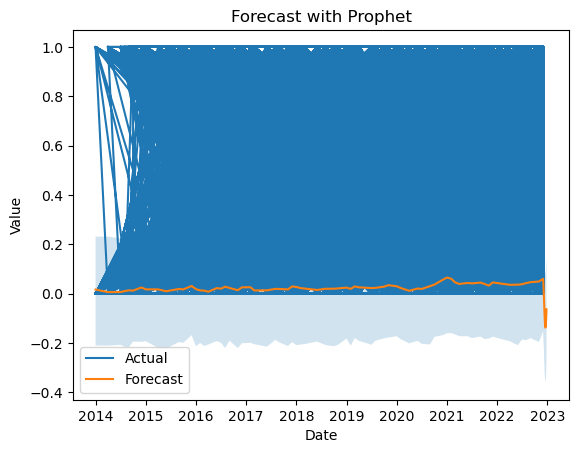

In [212]:
import matplotlib.pyplot as plt

# Plot the actual data
plt.plot(X_train['ds'], X_train['y'], label='Actual')

# Plot the forecasted values
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')

# Plot the uncertainty interval
plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'], alpha=0.2)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast with Prophet')
plt.legend()

# Show the plot
plt.show()


In [ ]:
## With additional columns

from fbprophet import Prophet
model = Prophet()
model.add_regressor('Close')
model.fit(X_train)
future_dates = model.make_future_dataframe(periods=30)
future_dates['Close'] = X_train['Close'].values[-1]
forecast = model.predict(future_dates)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


#### SVM 

In [213]:
df_svm

,ds,y,Close
0,2022-11-01,0,0.947876
1,2022-11-01,0,0.947876
2,2022-11-01,0,0.947876
3,2022-11-01,0,0.947876
4,2022-11-01,0,0.947876
...,...,...,...
642080,2014-10-01,0,0.106702
642081,2014-10-01,0,0.106702
642082,2014-10-01,0,0.106702
642084,2014-10-01,0,0.106702


In [215]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X= df_svm.drop(columns=["y"], axis=1)
y = df_svm['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.set_index('ds',inplace=True)
X_test.set_index('ds',inplace=True)

display(X_test)


,Close
ds,
2014-10-01,0.106702
2015-09-01,0.139815
2022-08-01,0.878013
2018-08-01,0.468351
2019-07-01,0.612250
...,...
2021-02-01,0.749403
2022-11-01,0.947876
2016-12-01,0.191102


In [217]:
X_train.reset_index()
X_test.reset_index()

,ds,Close
0,2014-10-01,0.106702
1,2015-09-01,0.139815
2,2022-08-01,0.878013
3,2018-08-01,0.468351
4,2019-07-01,0.612250
...,...,...
119590,2021-02-01,0.749403
119591,2022-11-01,0.947876
119592,2016-12-01,0.191102
119593,2022-06-01,0.804069


In [ ]:
# Evaluate your model

# Scaling the predictions
y_train_pred = norm.inverse_transform(y_train_pred)
y_test_pred = norm.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

# Check model performance on training and testing data 

train_timestamps = X_train.index
test_timestamps = X_test.index

print(len(train_timestamps), len(test_timestamps))

In [ ]:
from common.utils import mape

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(train_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(train_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [ ]:
# Print MAPE for training data
print('MAPE for training data: ', mape(y_train_pred, y_train)*100, '%')

print('MAPE for testing data: ', mape(y_test_pred, y_test)*100, '%')